<a href="https://colab.research.google.com/github/bchanyoo/dakum/blob/main/CV%5Bimage_analysis%2C_image_detection%2C_OCR%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from io import BytesIO #16진수로 된 것을 재구성하는 패키지의 모듈 불러오기.
from PIL import Image

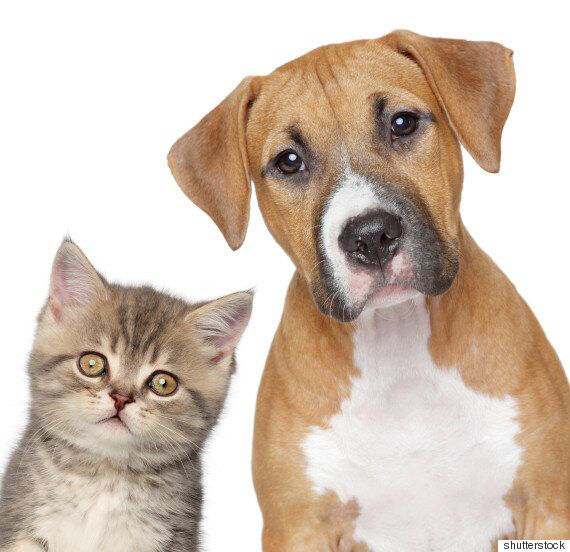

In [ ]:
image_url = 'https://blog.kakaocdn.net/dn/muDX0/btqDJgR9vk8/wfl7sd0nFK6zvzpfQQVEbk/img.jpg'
response = requests.get(image_url)  #이미지 속성을 가져오는 법, 이미지 코드가 출력됨. x자가 붙어 나오는 것은 텍스트 파일이 아니라는 뜻.(binary file, 16진수로 표현)
img = BytesIO(response.content) #바이너리로 변환 완료.
image = Image.open(img)
image #주피터 노트에서 쓰는 이미지 쓰기 공식

#한 줄로 쓰기. 익숙해지면 한 줄로도 가능. 코드는 image = Image.open(BytesIO(requests.get(image_url).content))


In [ ]:
#필요한 값 준비하기
key = '2057ac0a952f44f69d85c0e5f6fa4339'
endpoint = 'https://bchanyoo.cognitiveservices.azure.com/' + 'vision/v2.0/' #비전 기능의 버전 2.0 사용

In [ ]:
#endpoint로 이미지 분석, image detect를 할 수 있다. 우선 이미지 분석
analyze_endpoint = endpoint + 'analyze' #<를 붙이면 이미지를 분석할 수 있는 api
detect_endpoint = endpoint + 'detect' #<detect를 할 수 있는 api

In [ ]:
#웹 통신때 필요한 3개

header = {'Ocp-Apim-Subscription-key' : key} #헤더에다 키값 주는것
params = {'visualFeatures' : 'Categories,Description,Color'} #분석할 것들의 설명, 즉 3가지 옵션 주는 것.
data = {'url' : image_url}


In [ ]:
response = requests.post(analyze_endpoint, 
              headers = header,
              params = params,
              json=data)

In [ ]:
result = response.json()
result

{'categories': [{'name': 'animal_dog', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '8E633D',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'cat',
   'brown',
   'indoor',
   'dog',
   'looking',
   'animal',
   'staring',
   'camera',
   'standing',
   'tan',
   'front',
   'table',
   'laying',
   'close',
   'orange',
   'bed'],
  'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
    'confidence': 0.8600456236335963}]},
 'requestId': '30454281-d60b-4174-9b47-71726c26d95e',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [ ]:
#description 가져오기.
result['description'] #description만 return받기

{'tags': ['sitting',
  'cat',
  'brown',
  'indoor',
  'dog',
  'looking',
  'animal',
  'staring',
  'camera',
  'standing',
  'tan',
  'front',
  'table',
  'laying',
  'close',
  'orange',
  'bed'],
 'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
   'confidence': 0.8600456236335963}]}

In [ ]:
result['description']['captions'] #디스크립션 안의 캡션 가져오기

[{'text': 'a close up of a dog and a cat looking at the camera',
  'confidence': 0.8600456236335963}]

In [ ]:
result['description']['captions'][0] #리스트 인덱싱하기

{'text': 'a close up of a dog and a cat looking at the camera',
 'confidence': 0.8600456236335963}

In [ ]:
result['description']['captions'][0]['text'] #리스트 인덱싱하고 텍스트만 가져오기

'a close up of a dog and a cat looking at the camera'

In [ ]:
# object detection, 개체 탐지

headers = {'Ocp-Apim-Subscription-Key' :key}
parmas = {} #개체탐지엔 파라메타가 없다
data = {'url' : image_url}

In [ ]:
response = requests.post(detect_endpoint,
                         headers = header,
                         params = params, #내용이 없어도 넣어줘야 함.
                         json = data)

In [ ]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493},
   'object': 'dog',
   'confidence': 0.92,
   'parent': {'object': 'mammal',
    'confidence': 0.934,
    'parent': {'object': 'animal', 'confidence': 0.935}}},
  {'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317},
   'object': 'cat',
   'confidence': 0.869,
   'parent': {'object': 'mammal',
    'confidence': 0.88,
    'parent': {'object': 'animal', 'confidence': 0.881}}}],
 'requestId': '8b013091-a7f4-4ae6-be5c-ba822968df29',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont #그림을 다룰 때 필요한 패키지와 모듈

draw = ImageDraw.Draw(image) #용량이 큰 이미지를 Draw 모드로 바꾸는 코드임.


In [ ]:
def MakeBox(res): # 박스만들기 함수
  objects = res['objects']
  for obj in objects: #안의 rectangle 개수만큼 반복문.
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red') #좌표, 컬러

    objectName = obj['object']
    
    draw.text((x,y), objectName, fill = 'red') #좌표, 이름, 컬러

In [ ]:
MakeBox(result)

{'x': 195, 'y': 53, 'w': 360, 'h': 493}
{'x': 0, 'y': 235, 'w': 260, 'h': 317}


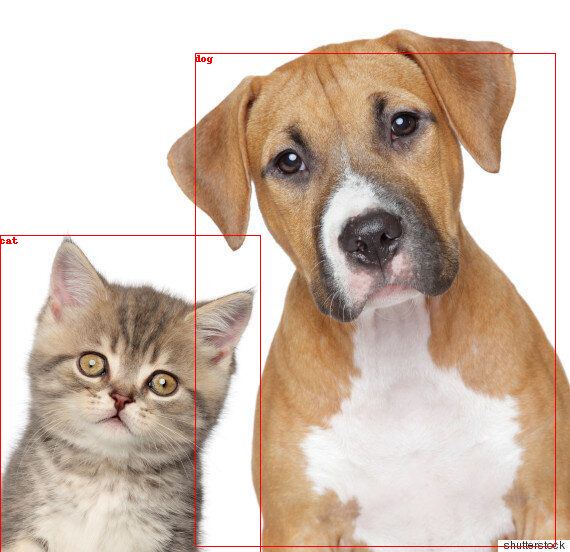

In [ ]:
image

In [ ]:
ocr_endpoint = endpoint + 'ocr' #optical character recognition 이미지 내의 글자 인식

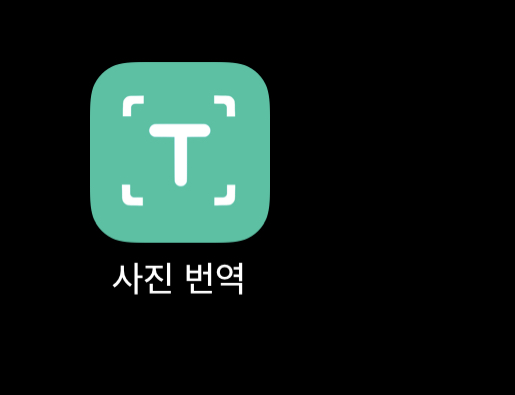

In [ ]:
image_url = "https://postfiles.pstatic.net/MjAyMzAzMzBfNTQg/MDAxNjgwMTc4NzgwMDA2.niWaoUu2oF9Q68_VUezBkW9MJIlnKKjO6JPd0x69Ra0g.7qgBsHLFkxnX8CAw6osO4v0-s30I-wpO3_UY9BYNvYQg.JPEG.ces713/IMG_9858.jpg?type=w966"
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {'language' : 'ko', 'detectOrientation' : 'true'} #unk(언노운, 쓰면 auto detect 가능. orientation = 방향, 방향을 자동으로 인식)
data = {'url' : image_url}

In [ ]:
response = requests.post(ocr_endpoint,
                         headers = header,
                         params = params,
                         json = data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '112,124,131,171',
   'lines': [{'boundingBox': '149,124,86,82',
     'words': [{'boundingBox': '149,124,86,82', 'text': 'T』'}]},
    {'boundingBox': '112,262,131,33',
     'words': [{'boundingBox': '112,262,59,33', 'text': '사진'},
      {'boundingBox': '186,262,57,33', 'text': '번역'}]}]}]}